In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequality-white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
data.duplicated().sum()

937

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
import warnings
warnings.filterwarnings('ignore')

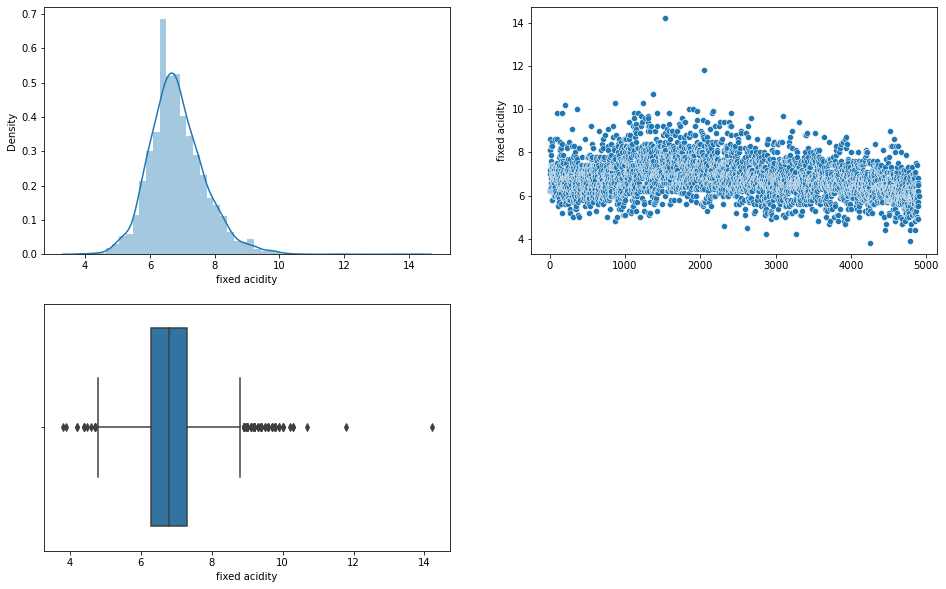

In [9]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['fixed acidity'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["fixed acidity"])
plt.subplot(2,2,3)
sns.boxplot(data['fixed acidity'])
plt.show()

In [10]:
selected_column = data["fixed acidity"]

std = selected_column.std()
avg = selected_column.mean()

tsp = avg + 3*std
tsm = avg - 3*std

outliers = data[((selected_column > tsp) | (selected_column < tsm))].index

data.drop(index=outliers, inplace=True)

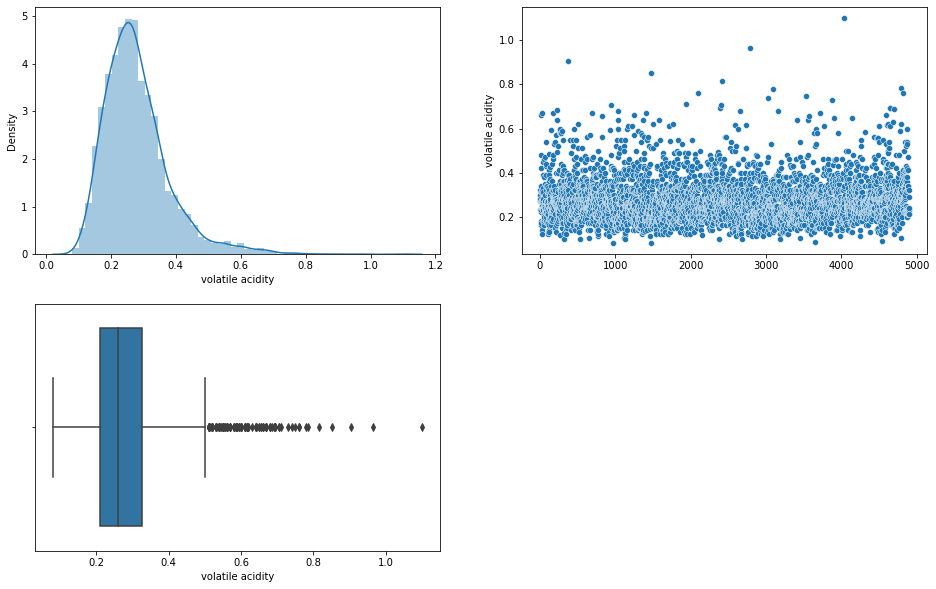

In [11]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['volatile acidity'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["volatile acidity"])
plt.subplot(2,2,3)
sns.boxplot(data['volatile acidity'])
plt.show()

In [12]:
selected_column = data["volatile acidity"]

q1 = selected_column.quantile(q=0.25)
q3 = selected_column.quantile(q=0.75)

iqr = q3 - q1

minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
max_idxs = data[selected_column > maximum].index
min_idxs = data[selected_column < minimum].index

data.drop(index=max_idxs, inplace=True)
data.drop(index=min_idxs, inplace=True)

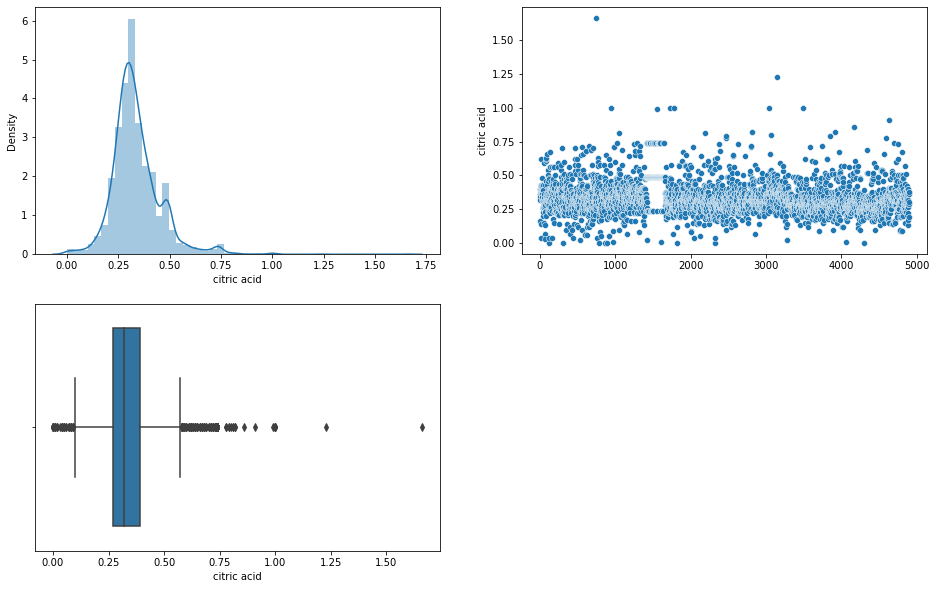

In [13]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['citric acid'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["citric acid"])
plt.subplot(2,2,3)
sns.boxplot(data['citric acid'])
plt.show()

In [14]:
selected_column = data["citric acid"]

q1 = selected_column.quantile(q=0.25)
q3 = selected_column.quantile(q=0.75)

iqr = q3 - q1

minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
max_idxs = data[selected_column > maximum].index
min_idxs = data[selected_column < minimum].index

data.drop(index=max_idxs, inplace=True)
data.drop(index=min_idxs, inplace=True)

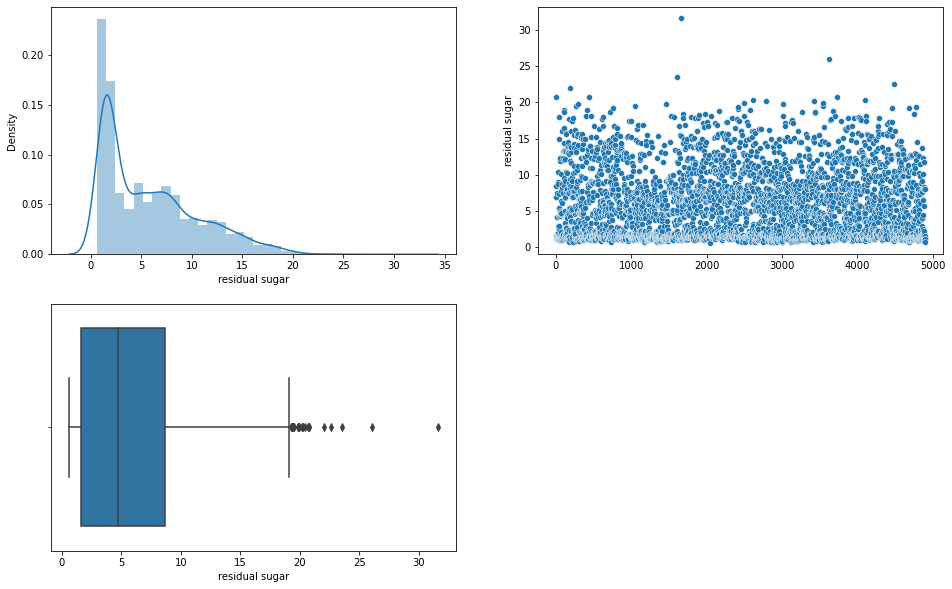

In [15]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['residual sugar'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["residual sugar"])
plt.subplot(2,2,3)
sns.boxplot(data['residual sugar'])
plt.show()

In [16]:
selected_column = data["residual sugar"]

q1 = selected_column.quantile(q=0.25)
q3 = selected_column.quantile(q=0.75)

iqr = q3 - q1

minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
max_idxs = data[selected_column > maximum].index
min_idxs = data[selected_column < minimum].index

data.drop(index=max_idxs, inplace=True)
data.drop(index=min_idxs, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 1 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3584 non-null   float64
 1   volatile acidity      3584 non-null   float64
 2   citric acid           3584 non-null   float64
 3   residual sugar        3584 non-null   float64
 4   chlorides             3584 non-null   float64
 5   free sulfur dioxide   3584 non-null   float64
 6   total sulfur dioxide  3584 non-null   float64
 7   density               3584 non-null   float64
 8   pH                    3584 non-null   float64
 9   sulphates             3584 non-null   float64
 10  alcohol               3584 non-null   float64
 11  quality               3584 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 493.0 KB


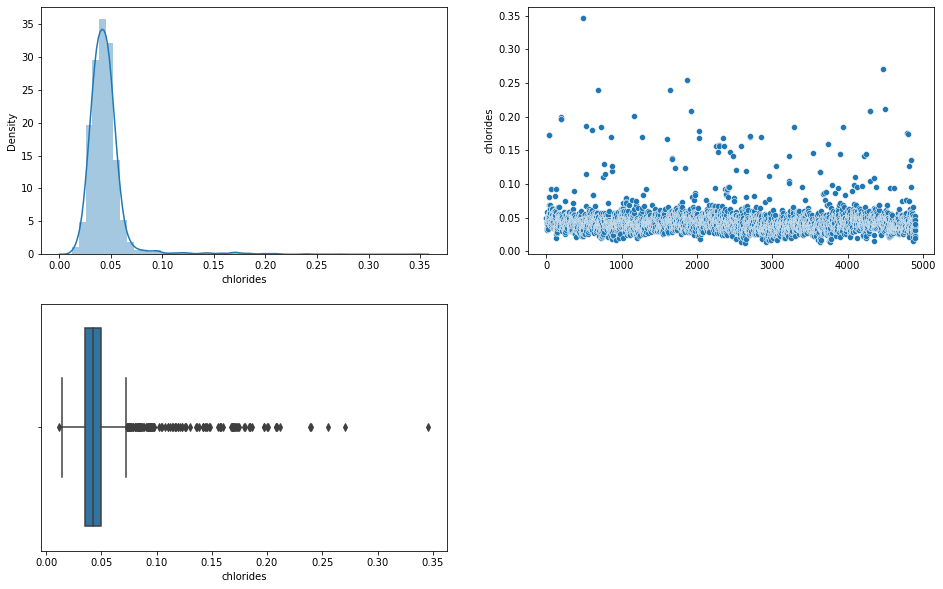

In [18]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['chlorides'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["chlorides"])
plt.subplot(2,2,3)
sns.boxplot(data['chlorides'])
plt.show()

In [19]:
selected_column = data["chlorides"]

std = selected_column.std()
avg = selected_column.mean()

tsp = avg + 3*std
tsm = avg - 3*std

outliers = data[((selected_column > tsp) | (selected_column < tsm))].index

data.drop(index=outliers, inplace=True)

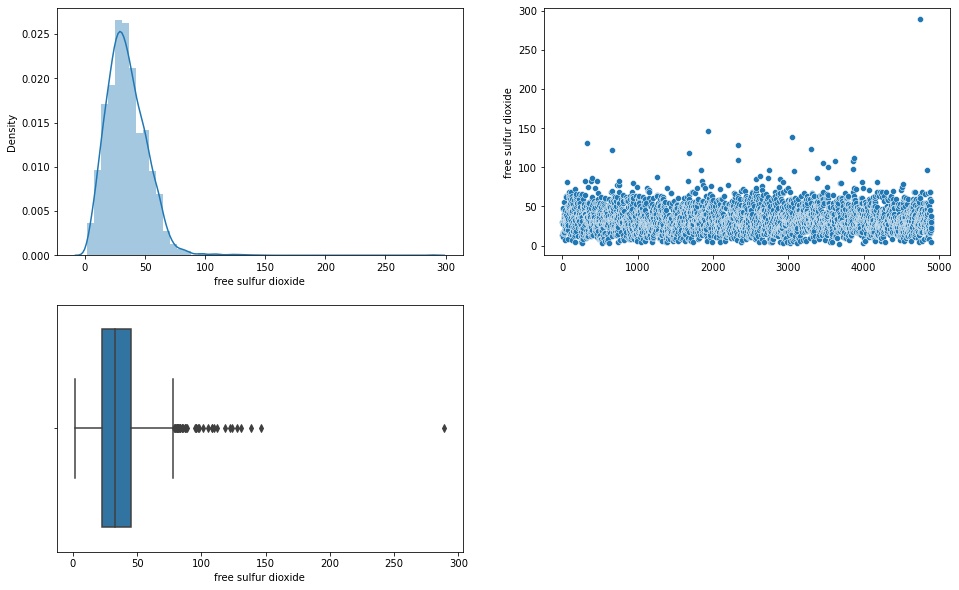

In [20]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['free sulfur dioxide'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["free sulfur dioxide"])
plt.subplot(2,2,3)
sns.boxplot(data['free sulfur dioxide'])
plt.show()

In [21]:
selected_column = data["free sulfur dioxide"]

std = selected_column.std()
avg = selected_column.mean()

tsp = avg + 3*std
tsm = avg - 3*std

outliers = data[((selected_column > tsp) | (selected_column < tsm))].index

data.drop(index=outliers, inplace=True)

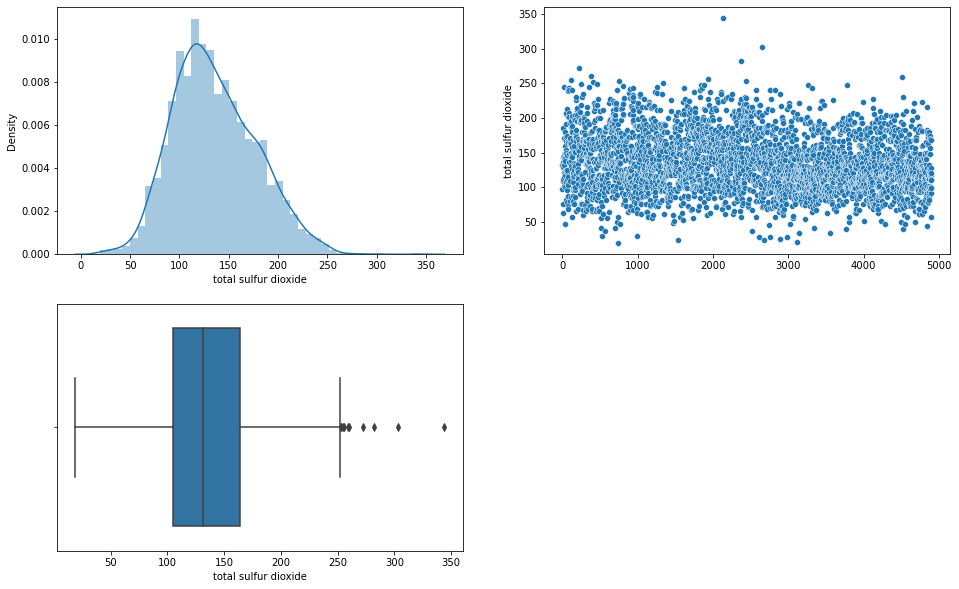

In [22]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['total sulfur dioxide'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["total sulfur dioxide"])
plt.subplot(2,2,3)
sns.boxplot(data['total sulfur dioxide'])
plt.show()

In [23]:
selected_column = data["total sulfur dioxide"]

q1 = selected_column.quantile(q=0.25)
q3 = selected_column.quantile(q=0.75)

iqr = q3 - q1

minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
max_idxs = data[selected_column > maximum].index
min_idxs = data[selected_column < minimum].index

data.drop(index=max_idxs, inplace=True)
data.drop(index=min_idxs, inplace=True)

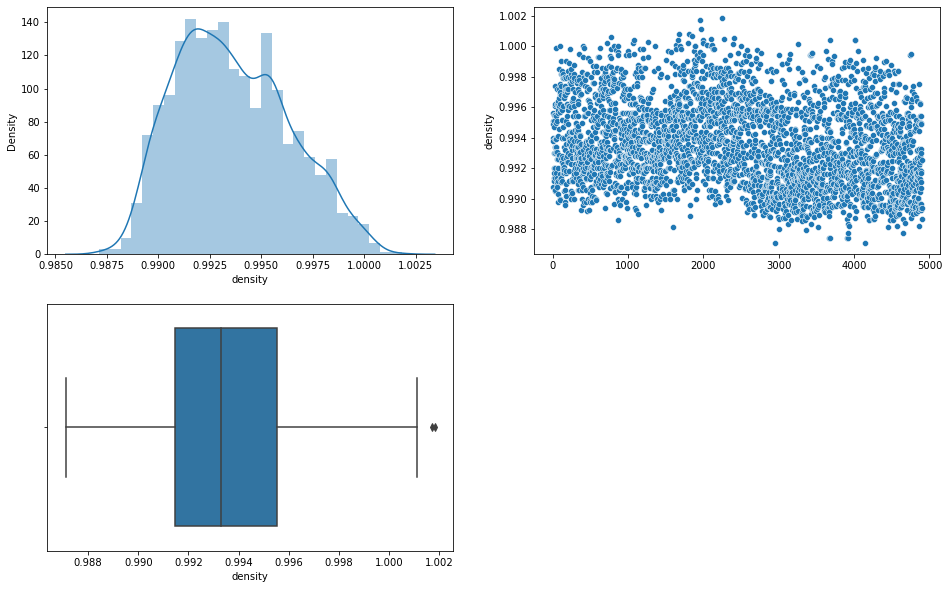

In [24]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['density'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["density"])
plt.subplot(2,2,3)
sns.boxplot(data['density'])
plt.show()

In [25]:
selected_column = data["density"]

q1 = selected_column.quantile(q=0.25)
q3 = selected_column.quantile(q=0.75)

iqr = q3 - q1

minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
max_idxs = data[selected_column > maximum].index
min_idxs = data[selected_column < minimum].index

data.drop(index=max_idxs, inplace=True)
data.drop(index=min_idxs, inplace=True)

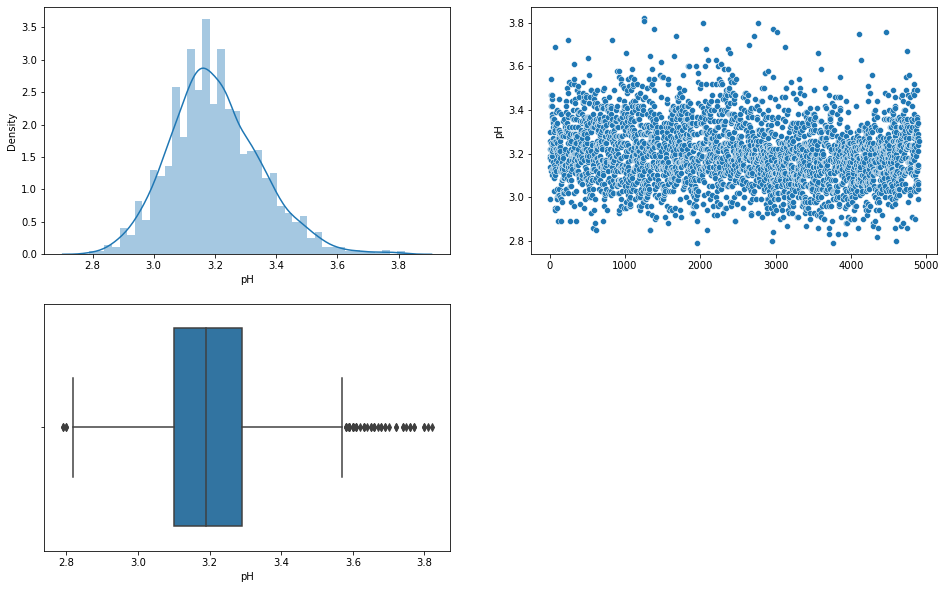

In [26]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['pH'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["pH"])
plt.subplot(2,2,3)
sns.boxplot(data['pH'])
plt.show()

In [27]:
selected_column = data["pH"]

std = selected_column.std()
avg = selected_column.mean()

tsp = avg + 3*std
tsm = avg - 3*std

outliers = data[((selected_column > tsp) | (selected_column < tsm))].index

data.drop(index=outliers, inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 1 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3459 non-null   float64
 1   volatile acidity      3459 non-null   float64
 2   citric acid           3459 non-null   float64
 3   residual sugar        3459 non-null   float64
 4   chlorides             3459 non-null   float64
 5   free sulfur dioxide   3459 non-null   float64
 6   total sulfur dioxide  3459 non-null   float64
 7   density               3459 non-null   float64
 8   pH                    3459 non-null   float64
 9   sulphates             3459 non-null   float64
 10  alcohol               3459 non-null   float64
 11  quality               3459 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 351.3 KB


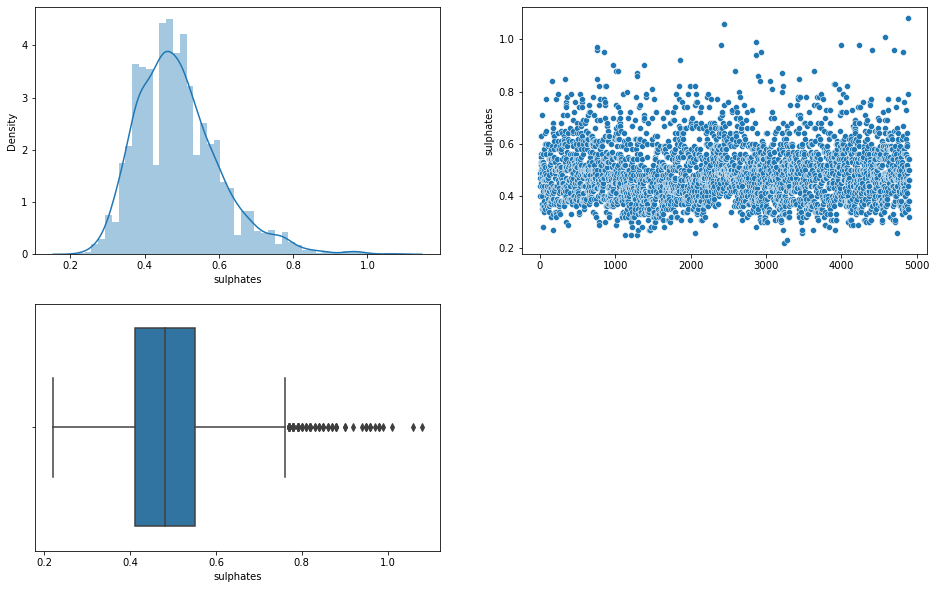

In [29]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['sulphates'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["sulphates"])
plt.subplot(2,2,3)
sns.boxplot(data['sulphates'])
plt.show()

In [30]:
selected_column = data["sulphates"]

q1 = selected_column.quantile(q=0.25)
q3 = selected_column.quantile(q=0.75)

iqr = q3 - q1

minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr
max_idxs = data[selected_column > maximum].index
min_idxs = data[selected_column < minimum].index

data.drop(index=max_idxs, inplace=True)
data.drop(index=min_idxs, inplace=True)

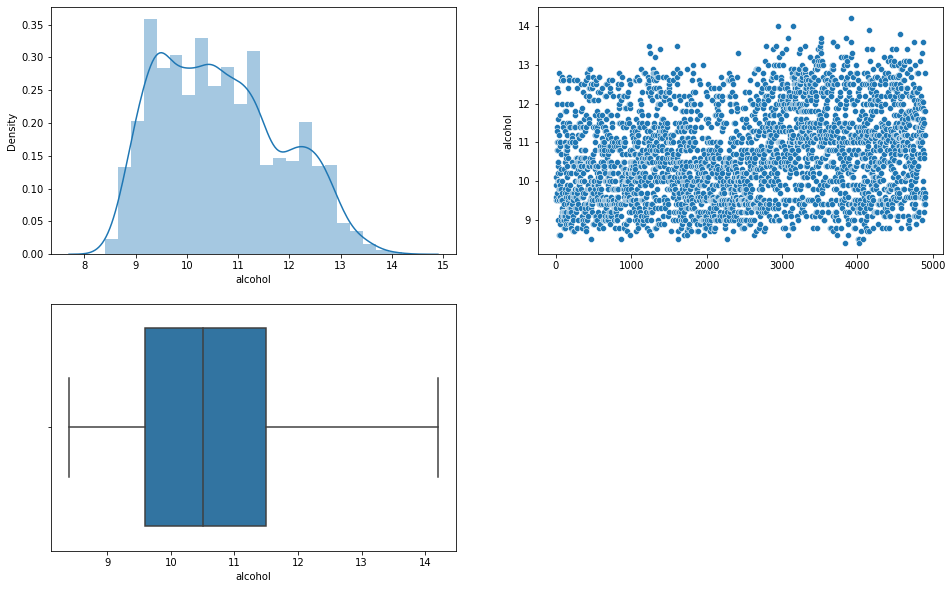

In [31]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data['alcohol'])
plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data.index, y=data["alcohol"])
plt.subplot(2,2,3)
sns.boxplot(data['alcohol'])
plt.show()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 1 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3372 non-null   float64
 1   volatile acidity      3372 non-null   float64
 2   citric acid           3372 non-null   float64
 3   residual sugar        3372 non-null   float64
 4   chlorides             3372 non-null   float64
 5   free sulfur dioxide   3372 non-null   float64
 6   total sulfur dioxide  3372 non-null   float64
 7   density               3372 non-null   float64
 8   pH                    3372 non-null   float64
 9   sulphates             3372 non-null   float64
 10  alcohol               3372 non-null   float64
 11  quality               3372 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 471.5 KB


In [33]:
bins = (1, 6.5, 10)
labels = [0, 1]
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)

<AxesSubplot:>

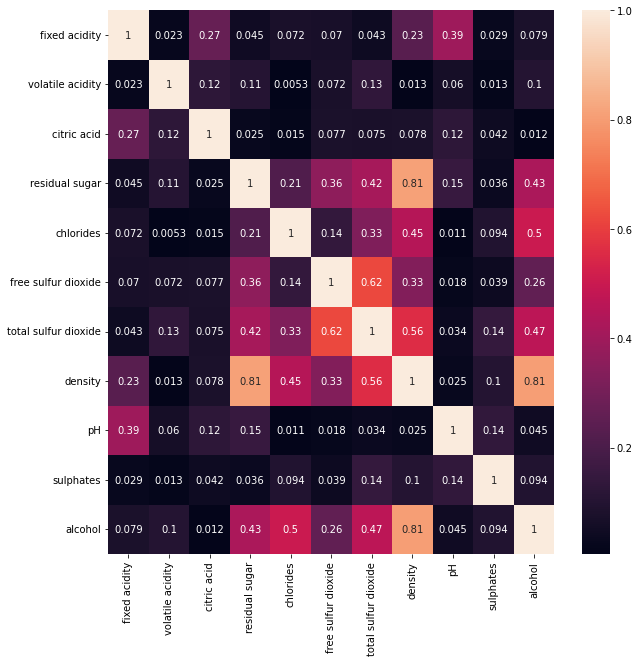

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True)

In [35]:
data["quality"].value_counts()

0    2618
1     754
Name: quality, dtype: int64

In [36]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [40]:
Xtrain_o, ytrain_o = sm.fit_resample(Xtrain, ytrain)

In [41]:
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(Xtrain_o, ytrain_o, test_size=0.25, random_state=10)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 250, random_state=0)
rfc.fit(Xtrain1, ytrain1)

ypred = rfc.predict(Xtest1)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
confusion_matrix(ytest1, ypred)

array([[386, 100],
       [ 49, 443]], dtype=int64)

In [45]:
print(classification_report(ytest1, ypred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       486
           1       0.82      0.90      0.86       492

    accuracy                           0.85       978
   macro avg       0.85      0.85      0.85       978
weighted avg       0.85      0.85      0.85       978



In [46]:
confusion_matrix(ytest, rfc.predict(Xtest))

array([[550, 112],
       [ 61, 120]], dtype=int64)

In [47]:
print(classification_report(ytest, rfc.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       662
           1       0.52      0.66      0.58       181

    accuracy                           0.79       843
   macro avg       0.71      0.75      0.72       843
weighted avg       0.82      0.79      0.80       843



In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(Xtrain1, ytrain1)

ypred1 = xgb.predict(Xtest1)

In [49]:
confusion_matrix(ytest1, ypred1)

array([[401,  85],
       [ 61, 431]], dtype=int64)

In [50]:
print(classification_report(ytest1, ypred1))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       486
           1       0.84      0.88      0.86       492

    accuracy                           0.85       978
   macro avg       0.85      0.85      0.85       978
weighted avg       0.85      0.85      0.85       978



In [51]:
confusion_matrix(ytest, xgb.predict(Xtest))

array([[583,  79],
       [ 88,  93]], dtype=int64)

In [52]:
print(classification_report(ytest, xgb.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       662
           1       0.54      0.51      0.53       181

    accuracy                           0.80       843
   macro avg       0.70      0.70      0.70       843
weighted avg       0.80      0.80      0.80       843

